In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("/content/drive/MyDrive/datasets/Dataset.csv")
data.head()

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY


In [3]:
print('Rows: {}'.format(data.shape[0]))
print('Columns: {}'.format(data.shape[1]))

Rows: 3577296
Columns: 87


## Preproccessing and Feature Selection

Text(0.5, 1.0, 'Top 5 applications')

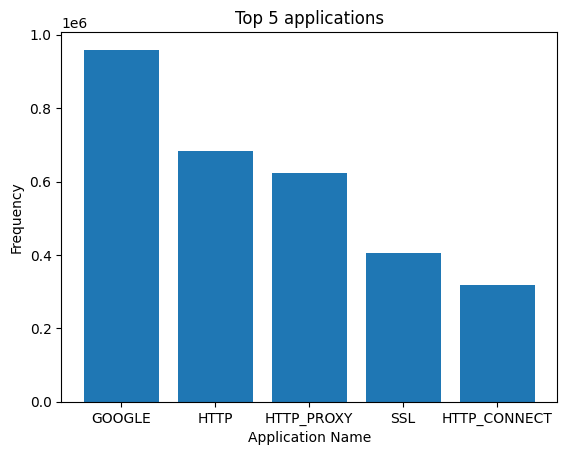

In [4]:
# Undersampling
freq_protocol = data['ProtocolName'].value_counts()
application_name = []
frequency_count = []
for key, value in freq_protocol.items():
    application_name.append(key)
    frequency_count.append(value)


# graph of top 5 application names
plt.bar(application_name[:5], frequency_count[:5])
plt.xlabel("Application Name")
plt.ylabel("Frequency")
plt.title("Top 5 applications")

In [5]:
# filtering the classes which have more than 10000 rows

ProtocolName = []
for key, value in freq_protocol.items():
    if (value >= 10000):
        ProtocolName.append(key)

print(ProtocolName)

['GOOGLE', 'HTTP', 'HTTP_PROXY', 'SSL', 'HTTP_CONNECT', 'YOUTUBE', 'AMAZON', 'MICROSOFT', 'GMAIL', 'WINDOWS_UPDATE', 'SKYPE', 'FACEBOOK', 'DROPBOX', 'YAHOO', 'TWITTER', 'CLOUDFLARE', 'MSN']


In [6]:
# create the dataset based on the ProtocolName
listofDataFrames = []
for protocol in ProtocolName:
    listofDataFrames.append(pd.DataFrame(data[data['ProtocolName'] == protocol].sample(n = 10000)))

data = pd.concat(listofDataFrames)
data.shape

(170000, 87)

In [7]:
# remove rows that contain NULL values
data.dropna(inplace=True)
data.dropna(axis='columns')
data.reset_index(drop=True, inplace=True)

# remove columns which contains zeroes in the data
data = data.loc[:, (data != 0).any(axis=0)]

In [ ]:
print('Shape after removing rows with NULL Values')
print('Number of Rows: {}'.format(data.shape[0]))
print('Number of Columns: {}'.format(data.shape[1]))

Shape after removing rows with NULL Values
Number of Rows: 170000
Number of Columns: 77


In [8]:
# convert the protocol name (target column) to required format (int) using LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder().fit(data['ProtocolName'])
data['ProtocolName'] = encoder.transform(data['ProtocolName'])
values = encoder.inverse_transform(data['ProtocolName'])
target_column = data['ProtocolName']

# map the encoded value
encoded_target_column = {}
for i in range(len(data['ProtocolName'])):
    encoded_target_column[data['ProtocolName'][i]] = values[i]

print(encoded_target_column)

{5: 'GOOGLE', 6: 'HTTP', 8: 'HTTP_PROXY', 12: 'SSL', 7: 'HTTP_CONNECT', 16: 'YOUTUBE', 0: 'AMAZON', 9: 'MICROSOFT', 4: 'GMAIL', 14: 'WINDOWS_UPDATE', 11: 'SKYPE', 3: 'FACEBOOK', 2: 'DROPBOX', 15: 'YAHOO', 13: 'TWITTER', 1: 'CLOUDFLARE', 10: 'MSN'}


In [9]:
data.columns

Index(['Flow.ID', 'Source.IP', 'Source.Port', 'Destination.IP',
       'Destination.Port', 'Protocol', 'Timestamp', 'Flow.Duration',
       'Total.Fwd.Packets', 'Total.Backward.Packets',
       'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets',
       'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min',
       'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std',
       'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min',
       'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s',
       'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max',
       'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std',
       'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean',
       'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags',
       'Fwd.Header.Length', 'Bwd.Header.Length', 'Fwd.Packets.s',
       'Bwd.Packets.s', 'Min.Packet.Length', 'Max.Packet.Length',
       'Packet.Length.Mean', 'Packet.Length.Std', 'Packet.Length.Variance',
      

In [10]:
# removing extra columns that are not useful for finding correlation
dataset = data.drop(['Flow.ID','Source.IP','Label', 'Timestamp','Destination.IP', 'Source.Port', 'Destination.Port', 'Protocol'], axis=1)

x_dataset = dataset.drop(['ProtocolName'], axis = 1)
y_dataset = dataset['ProtocolName']

In [11]:
# correlation matrix
correlation_matrix = dataset.corr()
correlation_matrix.head()

,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,...,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol,ProtocolName
Flow.Duration,1.000000,0.088187,0.094150,0.052874,0.084889,0.189099,0.045292,0.179816,0.156906,0.147413,...,0.201932,0.237041,0.268334,0.135149,0.710832,0.469666,0.752308,0.639448,0.044058,-0.090819
Total.Fwd.Packets,0.088187,1.000000,0.866548,0.678027,0.541533,0.191421,0.028206,0.105821,0.044281,0.125152,...,0.115226,0.071405,0.121692,0.098665,-0.002742,0.007988,0.000265,-0.004759,0.000861,0.021322
Total.Backward.Packets,0.094150,0.866548,1.000000,0.554132,0.606259,0.139846,0.011548,0.062742,0.025588,0.191365,...,0.117978,0.095314,0.135912,0.094283,-0.003930,0.010628,0.000001,-0.006707,0.005938,0.032287
Total.Length.of.Fwd.Packets,0.052874,0.678027,0.554132,1.000000,0.002728,0.293961,0.050336,0.190849,0.095383,-0.006297,...,0.038418,0.029534,0.041318,0.030414,-0.005518,0.000734,-0.004349,-0.005894,-0.007771,-0.008271
Total.Length.of.Bwd.Packets,0.084889,0.541533,0.606259,0.002728,1.000000,0.028594,-0.005983,-0.031465,-0.025857,0.324712,...,0.136167,0.098030,0.158072,0.112927,-0.003081,0.012200,0.001314,-0.006366,0.012370,0.068678


[]

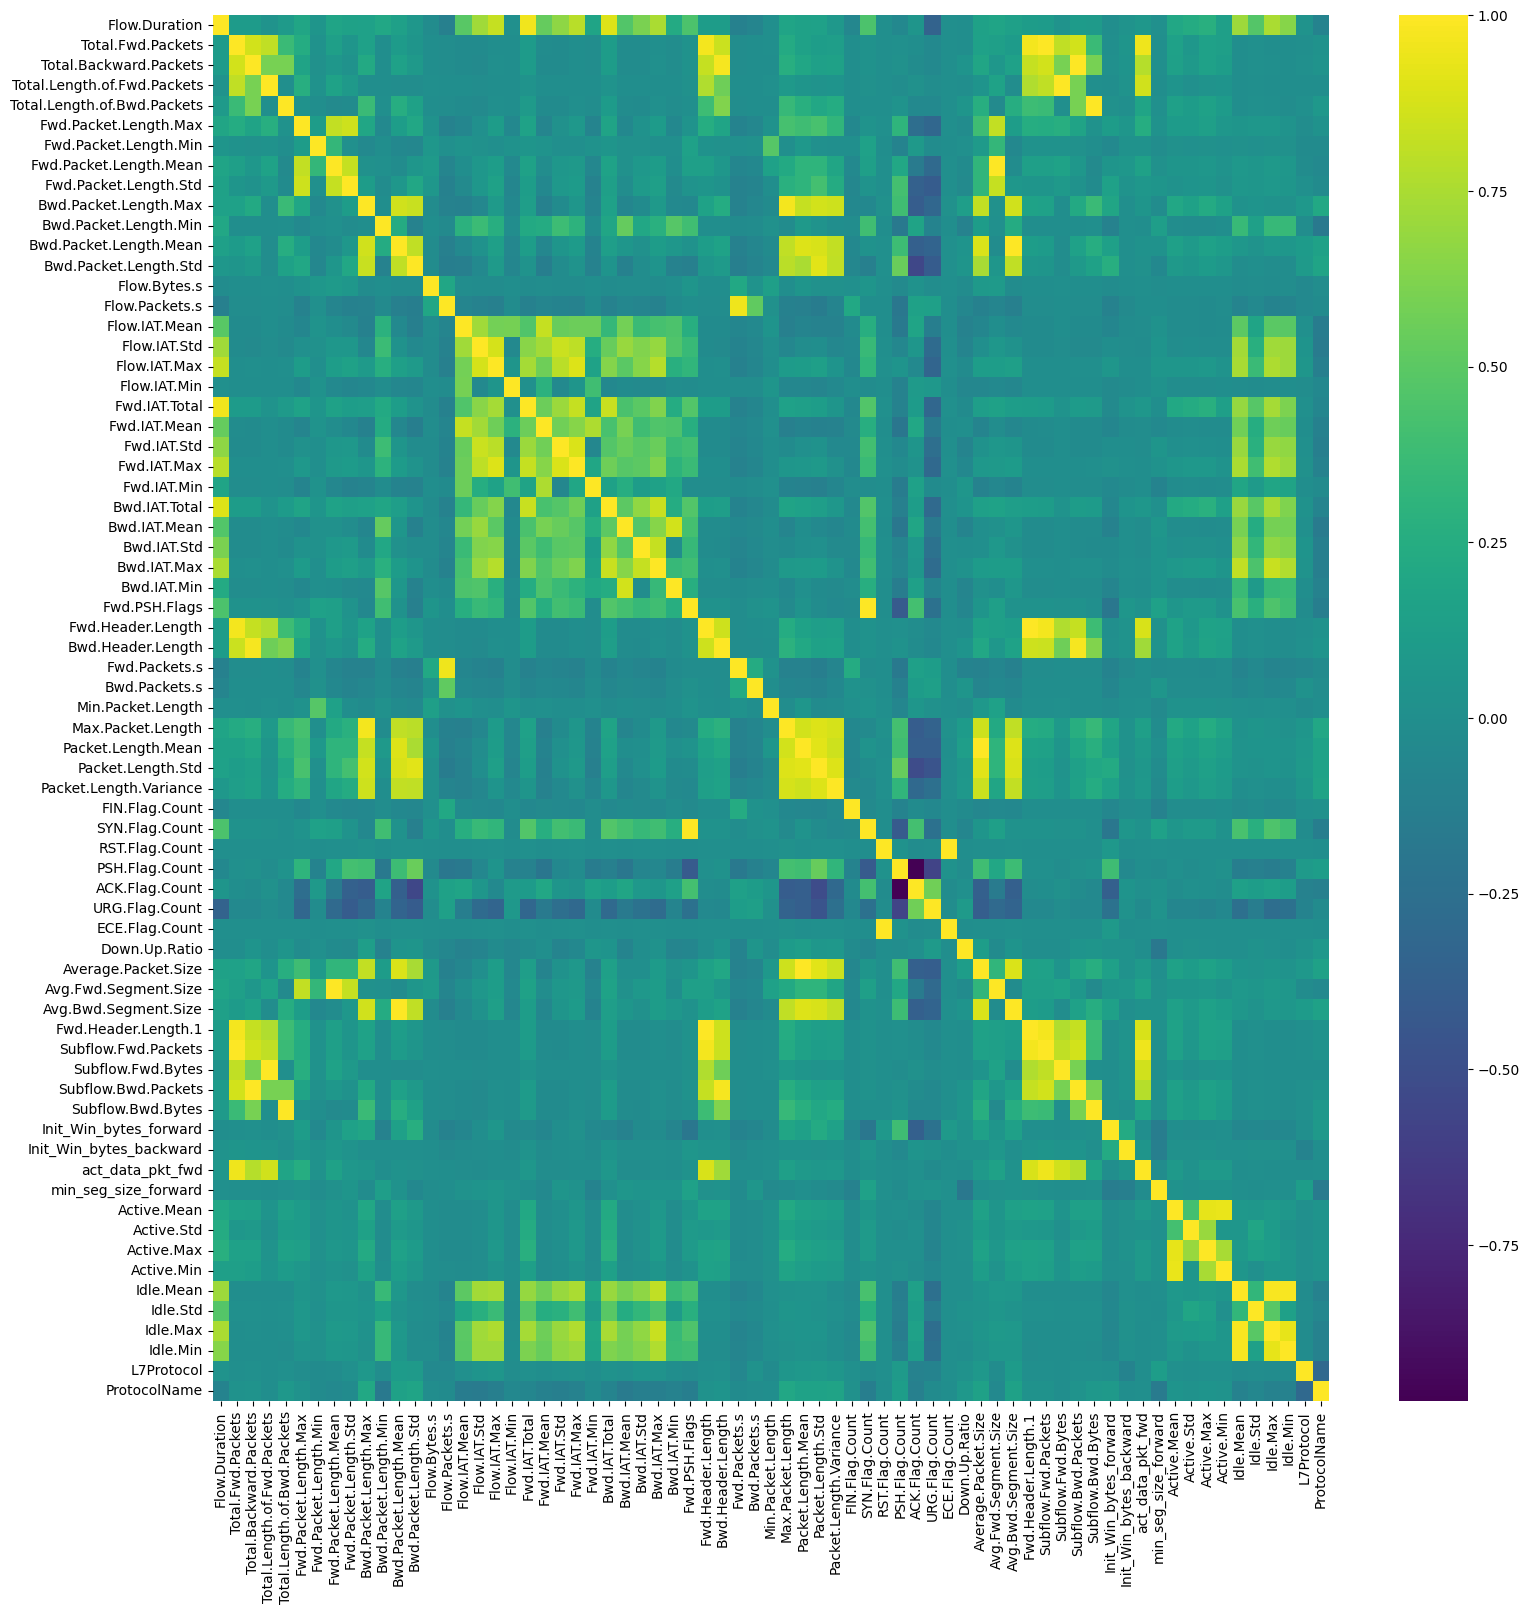

In [ ]:
# plotting the heatmap
plt.figure(figsize=(18, 18))
sns.heatmap(correlation_matrix, cmap='viridis')
plt.plot()

In [12]:
# Feature Selection with Correlation Matrix
sorted_corr_matrix_protocolName = correlation_matrix['ProtocolName'].sort_values(ascending=False)
allKeys = list(sorted_corr_matrix_protocolName.keys())

# remove the target column
allKeys.remove('ProtocolName')

feature_map = {}

# remove the features which have less than 0.01 correlation
# group the columns which have same correlation
for colName in allKeys:
    correlation = round(sorted_corr_matrix_protocolName[colName], 2)
    if (abs(correlation) >= 0.01):
        if correlation in feature_map:
            feature_map[correlation].append(colName)
        else:
            feature_map[correlation] = [colName]

print("Columns with absolute correlation greater than 0.01: \n")
print(feature_map)

Columns with absolute correlation greater than 0.01: 

{0.21: ['Bwd.Packet.Length.Max'], 0.2: ['Max.Packet.Length'], 0.18: ['Bwd.Packet.Length.Std'], 0.17: ['Packet.Length.Variance', 'Packet.Length.Mean'], 0.16: ['Packet.Length.Std', 'Bwd.Packet.Length.Mean', 'Avg.Bwd.Segment.Size', 'Average.Packet.Size'], 0.12: ['PSH.Flag.Count'], 0.09: ['Down.Up.Ratio', 'Init_Win_bytes_forward'], 0.07: ['Total.Length.of.Bwd.Packets', 'Subflow.Bwd.Bytes'], 0.04: ['Active.Mean', 'Active.Min', 'Active.Max', 'Bwd.Header.Length'], 0.03: ['Subflow.Bwd.Packets', 'Total.Backward.Packets', 'Fwd.Packet.Length.Max', 'Fwd.Header.Length.1', 'Fwd.Header.Length'], 0.02: ['FIN.Flag.Count', 'Subflow.Fwd.Packets', 'Total.Fwd.Packets', 'Active.Std'], -0.01: ['Total.Length.of.Fwd.Packets', 'Subflow.Fwd.Bytes', 'Flow.Bytes.s', 'Init_Win_bytes_backward'], -0.02: ['Bwd.Packets.s', 'Fwd.IAT.Min'], -0.03: ['Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Std', 'Fwd.Packets.s', 'Flow.Packets.s', 'URG.Flag.Count'], -0.04: ['Fwd.Pac

In [13]:
# choose random features for the same correlated values
final_features = []

import random
for correlation, column_list in feature_map.items():
    final_features.append(random.choice(column_list))

print("Number of Features : ", len(final_features))

print("Randomly selected columns for each correlation value: ")
print(final_features)

pos_value_columns = final_features

Number of Features :  29
Randomly selected columns for each correlation value: 
['Bwd.Packet.Length.Max', 'Max.Packet.Length', 'Bwd.Packet.Length.Std', 'Packet.Length.Variance', 'Bwd.Packet.Length.Mean', 'PSH.Flag.Count', 'Init_Win_bytes_forward', 'Subflow.Bwd.Bytes', 'Active.Max', 'Fwd.Header.Length.1', 'Total.Fwd.Packets', 'Total.Length.of.Fwd.Packets', 'Fwd.IAT.Min', 'URG.Flag.Count', 'Avg.Fwd.Segment.Size', 'Flow.IAT.Min', 'Idle.Std', 'Fwd.IAT.Total', 'Bwd.IAT.Total', 'Flow.Duration', 'Idle.Min', 'Bwd.IAT.Min', 'ACK.Flag.Count', 'Bwd.IAT.Max', 'Fwd.PSH.Flags', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Bwd.Packet.Length.Min', 'L7Protocol']


In [14]:
# the final x_dataset
x_dataset = data[pos_value_columns]
target_column = data['ProtocolName']

# split and standardize train set for GridSearch
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(x_dataset, y_dataset, test_size=0.2)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


## Training and evaluation

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
# hold the results
results_random_forest = {}
results_LR = {}
results_DT = {}
results_KNN = {}

In [16]:
import plotly.figure_factory as ff

def show_report(y_test, y_pred, matrix_title):
  conf_matrix = confusion_matrix(y_test, y_pred)

  # Create a figure for the confusion matrix
  fig = ff.create_annotated_heatmap(
      z=conf_matrix,
      x=ProtocolName,
      y=ProtocolName,
      colorscale='Viridis'
  )

  # Customize the layout
  fig.update_layout(
      title_text=matrix_title,
      xaxis_title='Predicted',
      yaxis_title='Actual',
      title_y=0.05,
      title_x=0.5,
      autosize=False,
      width=800,
      height=600
  )

  fig.show()

  # Classification Report with class names
  class_report = classification_report(y_test, y_pred, target_names=ProtocolName)
  print("\nClassification Report:")
  print(class_report)

# Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

params = {
    'n_estimators': [100, 150, 200]
}

# start grid search with 5 folds
rf_cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, cv= 5)
rf_cv.fit(X_train, y_train)

print("Best params for Random Forest: ")
print(rf_cv.best_params_)
print("Best Score for Random Forest: ")
print(rf_cv.best_score_)

# train the model with the best found params
rf = RandomForestClassifier(n_estimators=rf_cv.best_params_['n_estimators'], random_state=42)
rf.fit(X_train, y_train)
# predict
y_pred = rf.predict(X_test)
results_random_forest['Accuracy'] = accuracy_score(y_test, y_pred)
results_random_forest['Precision'] = precision_score(y_test, y_pred, average='macro')
results_random_forest['Recall'] = recall_score(y_test, y_pred, average='macro')
results_random_forest['F1 score'] = f1_score(y_test, y_pred, average='macro')

for metric, score in results_random_forest.items():
  print(metric, ": ", score)

show_report(y_test, y_pred, "Confusion Matrix Random Forest")

Best params for Random Forest: 
{'n_estimators': 200}
Best Score for Random Forest: 
0.9763676470588235
Accuracy :  0.9831764705882353
Precision :  0.9832233031755131
Recall :  0.9831256883321018
F1 score :  0.9831379660490394



Classification Report:
                precision    recall  f1-score   support

        GOOGLE       0.99      0.99      0.99      2006
          HTTP       1.00      1.00      1.00      2034
    HTTP_PROXY       0.98      0.95      0.96      1977
           SSL       0.99      0.98      0.99      2012
  HTTP_CONNECT       0.96      0.96      0.96      1982
       YOUTUBE       0.98      0.97      0.98      2013
        AMAZON       1.00      1.00      1.00      2022
     MICROSOFT       0.99      0.98      0.99      2010
         GMAIL       0.98      0.99      0.98      1990
WINDOWS_UPDATE       1.00      1.00      1.00      1993
         SKYPE       1.00      1.00      1.00      1979
      FACEBOOK       0.96      0.97      0.97      1999
       DROPBOX       0.99      0.99      0.99      2019
         YAHOO       0.96      0.98      0.97      2001
       TWITTER       0.99      0.99      0.99      2001
    CLOUDFLARE       1.00      0.99      0.99      1985
           MSN       0.

# Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

params = {
    'max_depth': [3,4,5,6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# start grid search with 3 folds
dt_cv = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params, cv= 5)
dt_cv.fit(X_train, y_train)

print("Best params for Decision Tree: ")
print(dt_cv.best_params_)
print("Best Score for Decision Tree: ")
print(dt_cv.best_score_)

# train the model with the best found params
dt = DecisionTreeClassifier(max_depth=dt_cv.best_params_['max_depth'],
                            min_samples_split=dt_cv.best_params_['min_samples_split'],
                            min_samples_leaf=dt_cv.best_params_['min_samples_leaf'],
                            random_state=42)
dt.fit(X_train, y_train)
# predict
y_pred = dt.predict(X_test)
results_DT['Accuracy'] = accuracy_score(y_test, y_pred)
results_DT['Precision'] = precision_score(y_test, y_pred, average='macro')
results_DT['Recall'] = recall_score(y_test, y_pred, average='macro')
results_DT['F1 score'] = f1_score(y_test, y_pred, average='macro')

for metric, score in results_DT.items():
  print(metric, ": ", score)

show_report(y_test, y_pred, "Confusion Matrix Decision Tree")

Best params for Decision Tree: 
{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score for Decision Tree: 
0.8827426470588235


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy :  0.8807941176470588
Precision :  0.823178887700428
Recall :  0.8823529411764706
F1 score :  0.8428247452439331



Classification Report:
                precision    recall  f1-score   support

        GOOGLE       1.00      1.00      1.00      2006
          HTTP       0.00      0.00      0.00      2034
    HTTP_PROXY       1.00      1.00      1.00      1977
           SSL       0.50      1.00      0.67      2012
  HTTP_CONNECT       1.00      1.00      1.00      1982
       YOUTUBE       1.00      1.00      1.00      2013
        AMAZON       1.00      1.00      1.00      2022
     MICROSOFT       1.00      1.00      1.00      2010
         GMAIL       1.00      1.00      1.00      1990
WINDOWS_UPDATE       0.49      1.00      0.66      1993
         SKYPE       1.00      1.00      1.00      1979
      FACEBOOK       1.00      1.00      1.00      1999
       DROPBOX       0.00      0.00      0.00      2019
         YAHOO       1.00      1.00      1.00      2001
       TWITTER       1.00      1.00      1.00      2001
    CLOUDFLARE       1.00      1.00      1.00      1985
           MSN       1.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# LR

In [20]:
from sklearn.linear_model import LogisticRegression

params = {
    'solver': ['lbfgs', 'sag'],
    'max_iter': [100,200,300]
}

# start grid search with 5 folds
lr_cv = GridSearchCV(estimator=LogisticRegression(), param_grid=params, cv= 5)
lr_cv.fit(X_train, y_train)

print("Best params for Logistic Regression: ")
print(lr_cv.best_params_)
print("Best Score for Logistic Regression: ")
print(lr_cv.best_score_)

# train the model with the best found params
lr = LogisticRegression(solver=lr_cv.best_params_['solver'],
                        max_iter=lr_cv.best_params_['max_iter'],
                        random_state=42)
lr.fit(X_train, y_train)
# predict
y_pred = lr.predict(X_test)
results_LR['Accuracy'] = accuracy_score(y_test, y_pred)
results_LR['Precision'] = precision_score(y_test, y_pred, average='macro')
results_LR['Recall'] = recall_score(y_test, y_pred, average='macro')
results_LR['F1 score'] = f1_score(y_test, y_pred, average='macro')

for metric, score in results_LR.items():
  print(metric, ": ", score)

show_report(y_test, y_pred, "Confusion Matrix Logistic Regression")

Best params for Logistic Regression: 
{'max_iter': 200, 'solver': 'lbfgs'}
Best Score for Logistic Regression: 
0.8110882352941177
Accuracy :  0.818
Precision :  0.824631772641182
Recall :  0.8172864403795662
F1 score :  0.8163925294861211



Classification Report:
                precision    recall  f1-score   support

        GOOGLE       1.00      0.99      1.00      2006
          HTTP       0.99      1.00      1.00      2034
    HTTP_PROXY       0.87      0.73      0.79      1977
           SSL       0.57      0.89      0.70      2012
  HTTP_CONNECT       0.66      0.58      0.62      1982
       YOUTUBE       0.70      0.74      0.72      2013
        AMAZON       1.00      1.00      1.00      2022
     MICROSOFT       0.67      0.82      0.74      2010
         GMAIL       0.76      0.59      0.66      1990
WINDOWS_UPDATE       1.00      0.99      1.00      1993
         SKYPE       0.87      0.86      0.86      1979
      FACEBOOK       0.67      0.70      0.68      1999
       DROPBOX       1.00      1.00      1.00      2019
         YAHOO       0.61      0.49      0.55      2001
       TWITTER       0.98      0.99      0.99      2001
    CLOUDFLARE       0.86      0.87      0.86      1985
           MSN       0.

# K-NN

In [21]:
from sklearn.neighbors import KNeighborsClassifier

# K-NN

params = {
    'n_neighbors': [3,5,7,9]
}

# start grid search with 5 folds
knn_cv = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params, cv= 5)
knn_cv.fit(X_train, y_train)

print("Best params for K-NN: ")
print(knn_cv.best_params_)
print("Best Score for K-NN: ")
print(knn_cv.best_score_)

# train the model with the best found params
knn = KNeighborsClassifier(n_neighbors=knn_cv.best_params_['n_neighbors'])
knn.fit(X_train, y_train)
# predict
y_pred = knn.predict(X_test)
results_KNN['Accuracy'] = accuracy_score(y_test, y_pred)
results_KNN['Precision'] = precision_score(y_test, y_pred, average='macro')
results_KNN['Recall'] = recall_score(y_test, y_pred, average='macro')
results_KNN['F1 score'] = f1_score(y_test, y_pred, average='macro')

for metric, score in results_KNN.items():
  print(metric, ": ", score)

show_report(y_test, y_pred, "Confusion Matrix K-NN")

Best params for K-NN: 
{'n_neighbors': 3}
Best Score for K-NN: 
0.819360294117647
Accuracy :  0.8263529411764706
Precision :  0.8313097096930707
Recall :  0.826011298276069
F1 score :  0.8267168446164083



Classification Report:
                precision    recall  f1-score   support

        GOOGLE       0.94      0.94      0.94      2006
          HTTP       0.97      0.96      0.96      2034
    HTTP_PROXY       0.77      0.90      0.83      1977
           SSL       0.91      0.96      0.93      2012
  HTTP_CONNECT       0.56      0.74      0.64      1982
       YOUTUBE       0.58      0.62      0.60      2013
        AMAZON       0.99      0.98      0.99      2022
     MICROSOFT       0.77      0.78      0.77      2010
         GMAIL       0.74      0.65      0.69      1990
WINDOWS_UPDATE       0.96      0.95      0.96      1993
         SKYPE       0.88      0.88      0.88      1979
      FACEBOOK       0.75      0.70      0.72      1999
       DROPBOX       0.94      0.88      0.91      2019
         YAHOO       0.82      0.67      0.74      2001
       TWITTER       0.94      0.93      0.94      2001
    CLOUDFLARE       0.89      0.86      0.88      1985
           MSN       0.

Performance Metrics Mean Values:
Random Forest:
  F1 score: 0.9831

Decision Tree:
  F1 score: 0.8428

Logistic Regression:
  F1 score: 0.8164

K-NN:
  F1 score: 0.8267



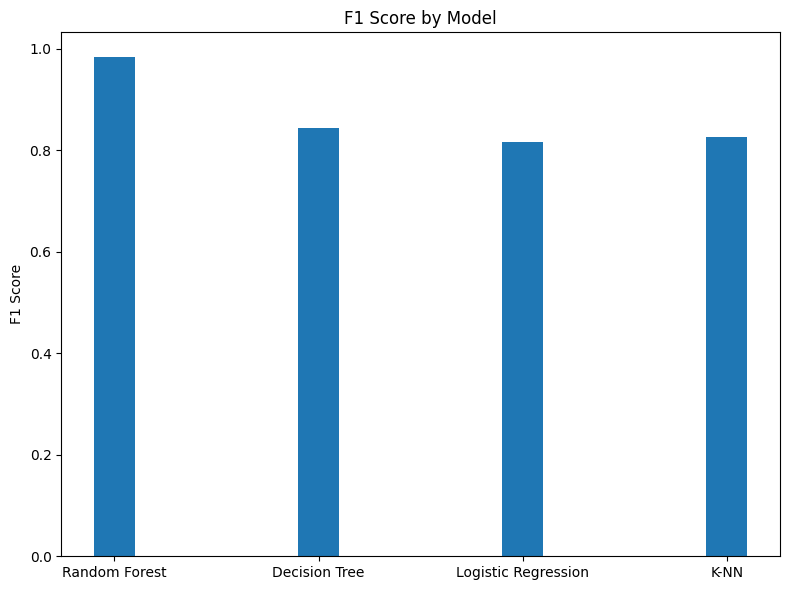

In [22]:
# compare f1 scores by model
results = {
    'Random Forest': results_random_forest,
    'Decision Tree': results_DT,
    'Logistic Regression': results_LR,
    'K-NN': results_KNN
}

model_names = ['Random Forest', 'Decision Tree','Logistic Regression', 'K-NN']

metric_values = {'F1 score': []}

print("Performance Metrics Mean Values:")
for model_name in model_names:
    f1 = results[model_name]['F1 score']

    metric_values['F1 score'].append(f1)

    print(f"{model_name}:")
    print(f"  F1 score: {f1:.4f}\n")

x = np.arange(len(model_names))
width = 0.2

fig, ax = plt.subplots(figsize=(8, 6))

rects = ax.bar(x, metric_values['F1 score'], width, label='F1 score')

ax.set_ylabel('F1 Score')
ax.set_title('F1 Score by Model')
ax.set_xticks(x)
ax.set_xticklabels(model_names)

fig.tight_layout()
plt.show()